In [109]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

In [110]:
#Customer Segmentation Classification
df = pd.read_csv("test.csv")

In [111]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [112]:
nuevo_dataset = df[['Age','Work_Experience', 'Family_Size']]

In [113]:
nuevo_dataset.Graduated = df.Graduated.replace(['No', 'Yes'], [0, 1])


C:\Users\Ronal\AppData\Local\Temp\ipykernel_15292\3179815099.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  nuevo_dataset.Graduated = df.Graduated.replace(['No', 'Yes'], [0, 1])


In [114]:
#nuevo_dataset.Profession.fillna('None', inplace=True)
nuevo_dataset.Work_Experience.fillna(0, inplace=True)

C:\Users\Ronal\AppData\Local\Temp\ipykernel_15292\3574265371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_dataset.Work_Experience.fillna(0, inplace=True)


In [115]:
#nuevo_dataset.Profession = nuevo_dataset.Profession.map({'Healthcare': 0, 'Engineer': 1, 'Lawyer': 2, 'Entertainment': 3, 'Artist': 4, 'Executive': 5, 'Doctor': 6, 'Homemaker': 7, 'Marketing': 8, 'None': 9})

In [116]:
#nuevo_dataset.Gender = nuevo_dataset.Gender.map({"Female" : 0, "Male" : 1})

In [117]:
#nuevo_dataset.Spending_Score = nuevo_dataset.Spending_Score.map({"Low" : 0, "Average" : 1, "High" : 2})
#nuevo_dataset.Segmentation = nuevo_dataset.Segmentation.map({"A" : 0, "B" : 1, "C" : 2, "D" : 3})

In [118]:
nuevo_dataset.Graduated.fillna(0, inplace=True)
nuevo_dataset.Family_Size.fillna(nuevo_dataset.Family_Size.mean(), inplace=True)

C:\Users\Ronal\AppData\Local\Temp\ipykernel_15292\3852658194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_dataset.Family_Size.fillna(nuevo_dataset.Family_Size.mean(), inplace=True)


In [119]:
nuevo_dataset.describe()


,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000
mean,43.649791,2.291207,2.825378
std,16.967015,3.258607,1.518149
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.825378
75%,53.000000,3.000000,4.000000
max,89.000000,14.000000,9.000000


In [120]:
centers = range(1, 5)

In [121]:
clusters = [KMeans(n_clusters=center) for center in centers]

In [122]:
scores = [model.fit(nuevo_dataset).score(nuevo_dataset) for model in clusters]

c:\Users\Ronal\Desktop\tarea\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ronal\Desktop\tarea\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\Ronal\Desktop\tarea\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ronal\Desktop\tarea\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


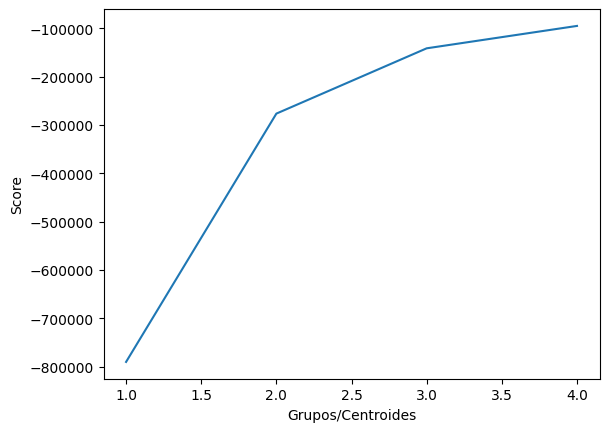

In [123]:
plt.plot(centers, scores)
plt.xlabel("Grupos/Centroides")
plt.ylabel("Score")
plt.show()

In [124]:
k_means = KMeans(n_clusters=4)
k_means.fit(nuevo_dataset)


c:\Users\Ronal\Desktop\tarea\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [125]:
k_means.cluster_centers_
#Age	Work_Experience	Family_Size

array([[26.40322581,  2.65437788,  3.43489775],
       [55.59925094,  1.68726592,  2.79870329],
       [41.06524184,  2.83689539,  2.5512518 ],
       [76.05059524,  0.86904762,  2.01847038]])

In [126]:
customer_groups = [
    'Clientes Gen Z',
    'Clientes Conejos jovenes y trabajadores',
    'Clientes Inexperimentados formalmente',
    'Clientes Equilibrados'
]

In [127]:
age = 40
Work_Experience = 1
family_size = 3
predicted = k_means.predict([[age, Work_Experience, family_size]])
print(f'Un cliente de {age} años, experiencia laboral de {Work_Experience} años y una familia de {family_size} es un {customer_groups[predicted[0]]}')

Un cliente de 40 años, experiencia laboral de 1 años y una familia de 3 es un Clientes Inexperimentados formalmente


c:\Users\Ronal\Desktop\tarea\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
